# Importations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
import sys
import os 

# Import python files 
!wget https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
!unzip python.zip
!rm python.zip
!mkdir models 
!mkdir results 

sys.path.append('/content/python')

from utils import * 
from q_learning import * 
from RL_algorithm import *
from discretize import * 


%matplotlib inline

--2021-04-21 10:17:27--  https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip [following]
--2021-04-21 10:17:27--  https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15896 (16K) [application/zip]
Saving to: ‘python.zip’

python.zip          100%[===================>]  15.52K  --.-KB/s    in 0s      

2021-04-21 10:17:27 (116 MB/s) - ‘python.zip’ saved [15896/15896]

Arch

# Environments 

In [49]:
ENVS = {'taxi' : gym.make("Taxi-v3").env, \
        'acrobot' :  Discretize(gym.make('Acrobot-v1'), N = 1000000000)}

In [3]:
NAME_ALGORITHM = 'q_learning'
SEEDS = [77,7,17,75,73,2,11,89,99,6]

In [56]:
create_files(ENVS, NAME_ALGORITHM)

# Q-learning implementation

![picture](https://github.com/clementbernardd/Count-Based-Exploration/raw/main/images/q_learning.png)


# COUNT-BASED EXPLORATION 

![picture](https://github.com/clementbernardd/Count-Based-Exploration/raw/main/images/algorithm1.png)

# Hyperparameters

In [53]:
HP = {'taxi' : {
    'alpha' : 0.01,
    'gamma' : 0.99,
    'epsilon' : 0.1,
    'beta' : 0.1
    } ,
    'acrobot' : {
        'alpha' : 0.01,
        'gamma' : 0.99,
        'epsilon' : 0.1,
        'beta' : 0.1
    }
}

In [6]:
all_means = {env : None for env in ENVS}
all_means_cb = {env : None for env in ENVS}
all_hash_cb = {env : None for env in ENVS}

# Taxi environment 

In [7]:
CURRENT_ENV = list(ENVS.keys())[0]

In [8]:
all_means[CURRENT_ENV], _ = train_all(Q_learning, HP[CURRENT_ENV], n_episodes = 500, name_env = CURRENT_ENV,\
                                      env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS , count_based= False)

In [9]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all(Q_learning, HP[CURRENT_ENV], n_episodes = 500, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS, count_based= True)

## Rewards

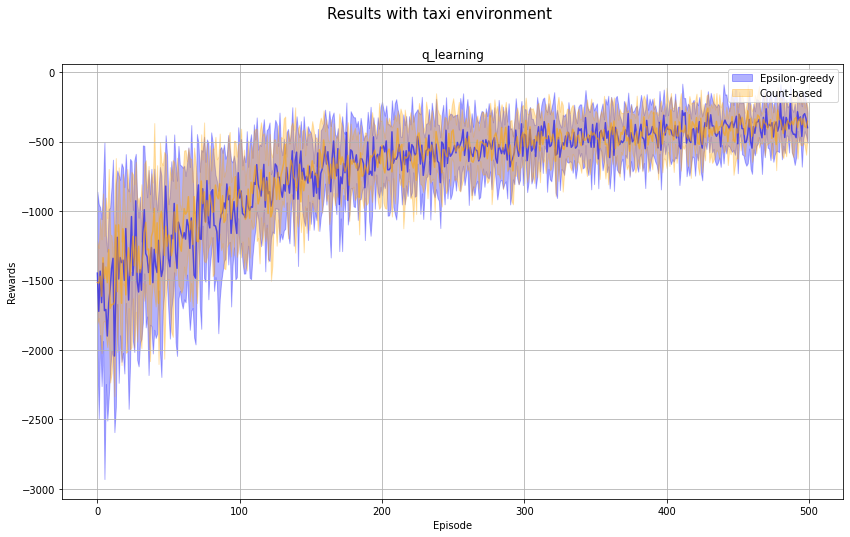

In [10]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histogram of the states 

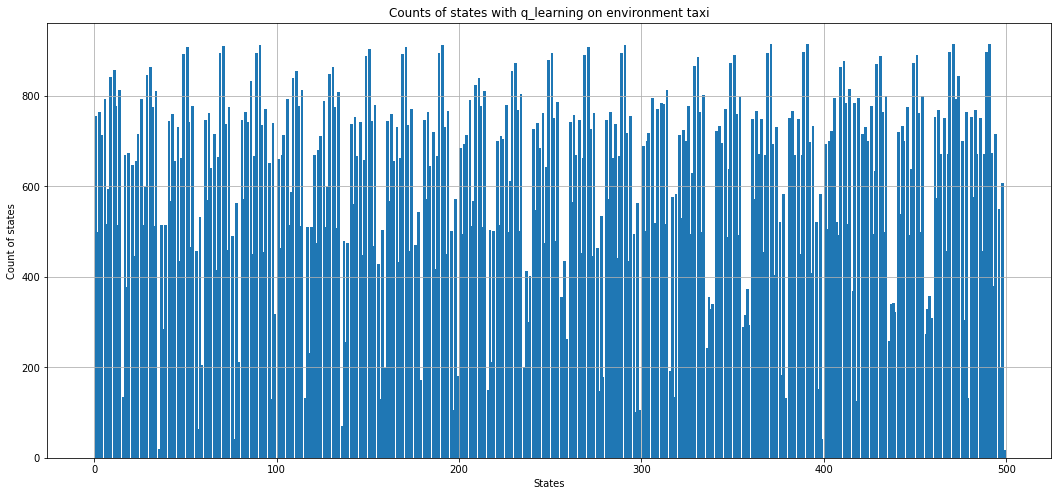

In [11]:
plot_barchart_count_based(np.array(list(all_hash_cb[CURRENT_ENV].values())).mean(axis = 0).squeeze(), figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)

# Acrobot environment 

In [37]:
CURRENT_ENV = list(ENVS.keys())[1]

In [38]:
all_means[CURRENT_ENV], _ = train_all(Q_learning, HP[CURRENT_ENV], n_episodes = 2000,\
                                      name_env = CURRENT_ENV,env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS , count_based= False)

In [39]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all(Q_learning, HP[CURRENT_ENV], n_episodes = 2000, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS, count_based= True)

## Rewards

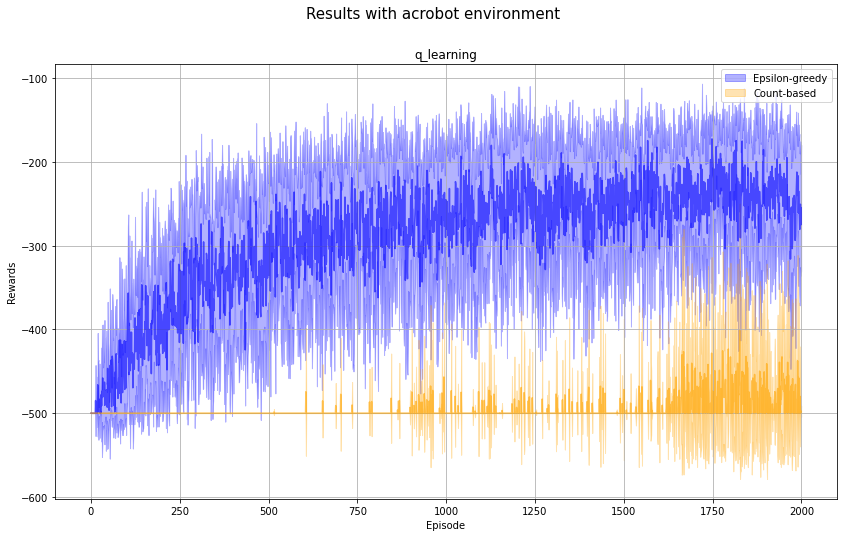

In [40]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histogram of the states 

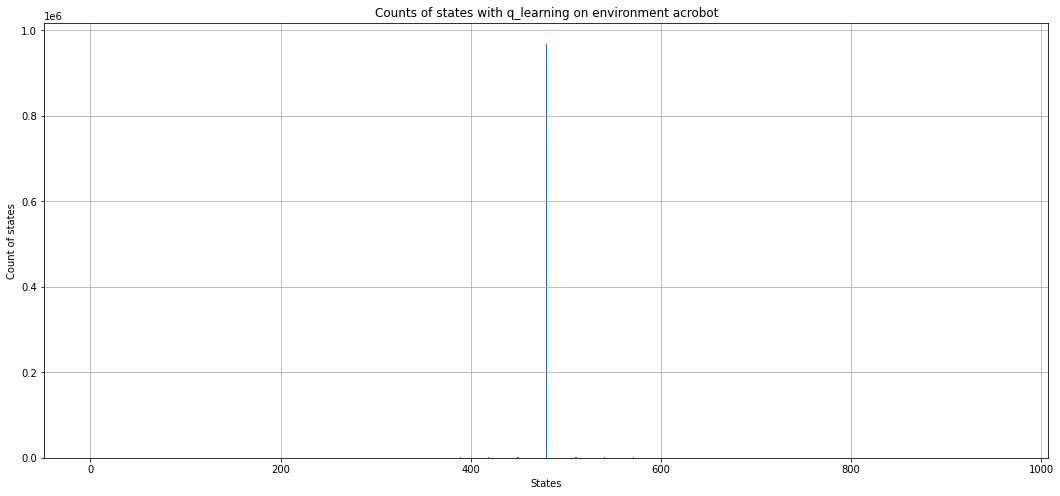

In [41]:
plot_barchart_count_based(np.array(list(all_hash_cb[CURRENT_ENV].values())).mean(axis = 0).squeeze(), figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)